# Configure environment

Following section required only if you're running this code in google collab, so if you need uncomment it and run

In [ ]:
# !git clone https://github.com/ArturGogiyan/NLP_research.git
# %cd NLP_research
# !pip install -r './requirements.txt'

# Dataset loading

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import dvc.api

!pip install 'dvc[gdrive]'

In [53]:
def read_dataset():
    with dvc.api.open('dataset/dataset_research.csv', repo='https://github.com/ArturGogiyan/NLP_research') as fd:
        return pd.read_csv(fd)

In [54]:
df = read_dataset()

print("Shape of data=>", df.shape)

Shape of data=> (5000, 6)


# Exploratory data analysis

Создание списка всех лейблов, присутствующих в данных

In [55]:
comment_labels = {}
comment_labels_combinations = {}
unique_labels = set()
unique_labels_combinations = set()

for i, row in df.iterrows():
    label_index = 0
    k = 0
    for j, cell in row.items():
        if str(cell)[:6] == '[\'824.':
            label_index = k
            break
        k += 1

    labels = row[k][1:-1].split(',')

    comment = ' '.join(row[:k])
    row['comment'] = comment
    for j, label in enumerate(labels):
        label_stripped = label.strip()[5:-3]
        labels[j] = label_stripped
        if label_stripped not in unique_labels:
            unique_labels.add(label_stripped)
    labels_combination = ' & '.join(labels)
    if labels_combination not in unique_labels_combinations:
        unique_labels_combinations.add(labels_combination)
    comment_labels[i] = labels
    comment_labels_combinations[i] = labels_combination

создание pandas.dataframe с разреженным вектором фич, где каждая колонка - отдельный лэйбл

In [56]:
df_unique_combinations = df[['comment']].copy()
for label in unique_labels:
    df[label] = 0
for label_combination in unique_labels_combinations:
    df_unique_combinations[label_combination] = 0

In [57]:
df = df.drop(df.columns[[1, 2, 3, 4, 5]], axis=1)

In [58]:
for index, labels in comment_labels.items():
    for label in labels:
        df.at[index, label] = 1

for index, label_combination in comment_labels_combinations.items():
    for label in label_combination:
        df_unique_combinations.at[index, label_combination] = 1

вывод первых 5 записей отформатированного датафрейма

In [59]:
df.head(5)

,comment,account-management.fingerprint-facial-recognition,staff-support.email,company-brand.general-satisfaction,attributes.size-fit,attributes.taste-flavour,attributes.cleanliness,company-brand.convenience,staff-support.agent-named,purchase-booking-experience.choice-variety,logistics-rides.speed,logistics-rides.order-accuracy,account-management.account-access,online-experience.updates-versions,company-brand.competitor,online-experience.language
0,"easy, very accessible",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Just a horrible app with a sign up experience ...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Downloaded the latest update and it still logs...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,Since latest update from Apple for the iPhone ...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,"Shockingly bad since the update, I had to rein...",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
df_unique_combinations.head(5)

,comment,account-management.fingerprint-facial-recognition & company-brand.general-satisfaction,attributes.size-fit & online-experience.updates-versions,attributes.taste-flavour,account-management.fingerprint-facial-recognition & account-management.account-access & company-brand.convenience,account-management.fingerprint-facial-recognition & account-management.account-access & company-brand.general-satisfaction,account-management.account-access & company-brand.general-satisfaction & company-brand.competitor,purchase-booking-experience.choice-variety,company-brand.general-satisfaction & online-experience.updates-versions,account-management.account-access & online-experience.updates-versions,...,attributes.cleanliness,staff-support.agent-named,account-management.fingerprint-facial-recognition & account-management.account-access & online-experience.updates-versions,company-brand.convenience & company-brand.competitor,account-management.account-access & company-brand.general-satisfaction & online-experience.updates-versions,company-brand.general-satisfaction & company-brand.competitor & online-experience.updates-versions,company-brand.general-satisfaction & company-brand.competitor,company-brand.competitor,company-brand.competitor & online-experience.updates-versions,online-experience.language
0,"easy, very accessible",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Just a horrible app with a sign up experience ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Downloaded the latest update and it still logs...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Since latest update from Apple for the iPhone ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Shockingly bad since the update, I had to rein...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   comment                                            5000 non-null   object
 1   account-management.fingerprint-facial-recognition  5000 non-null   int64 
 2   staff-support.email                                5000 non-null   int64 
 3   company-brand.general-satisfaction                 5000 non-null   int64 
 4   attributes.size-fit                                5000 non-null   int64 
 5   attributes.taste-flavour                           5000 non-null   int64 
 6   attributes.cleanliness                             5000 non-null   int64 
 7   company-brand.convenience                          5000 non-null   int64 
 8   staff-support.agent-named                          5000 non-null   int64 
 9   purchase-booking-ex

Получим частоты лейблов в датасете

In [62]:
feature_freqs = df.sum(axis=0, skipna=True)[1:].sort_values(ascending=True)

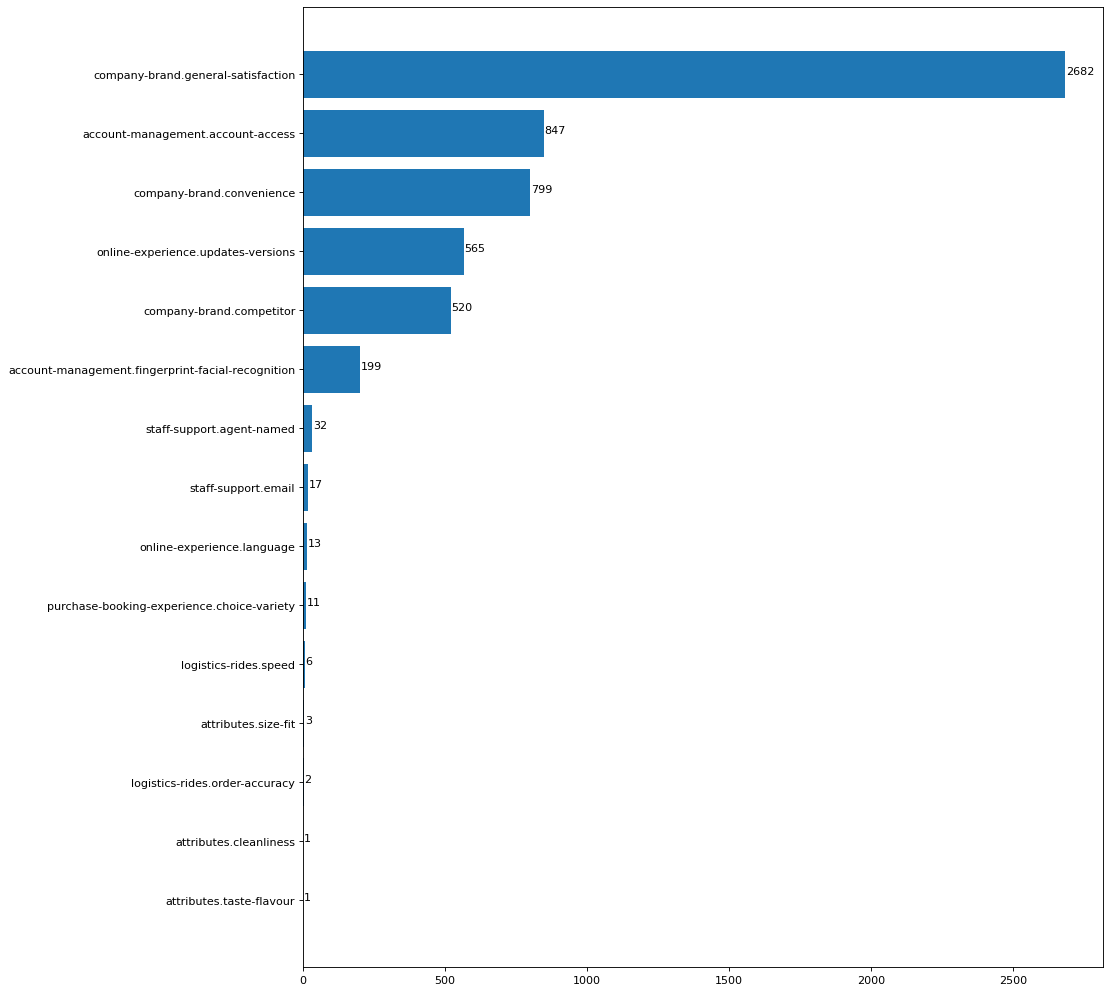

In [63]:
fig = plt.figure(figsize=(10, 12), dpi=80)
plt.xlabel('feature')
plt.ylabel('frequency')
plt.title('frequency of different features in applied dataset')

ax = fig.add_axes([0, 0, 1, 1])
ax.barh(feature_freqs.keys(), feature_freqs.values)

xlocs, xlabs = plt.xticks()
for i, v in enumerate(feature_freqs.values):
    ax.text(v + 3, i, str(v))

plt.show()

как видно, датасет не сбалансирован: для некоторых лэйблов существует лишь по несколько записей.
К примеру, лэйблы **attributes.cleanliness** и **attributes.taste-flavour** представленны лишь в 1 записи.

Рассмотрим распределение комментариев по сочетаниям лейблов

In [64]:
feature_freqs_combinations = df_unique_combinations.sum(axis=0, skipna=True)[1:].sort_values(ascending=True)

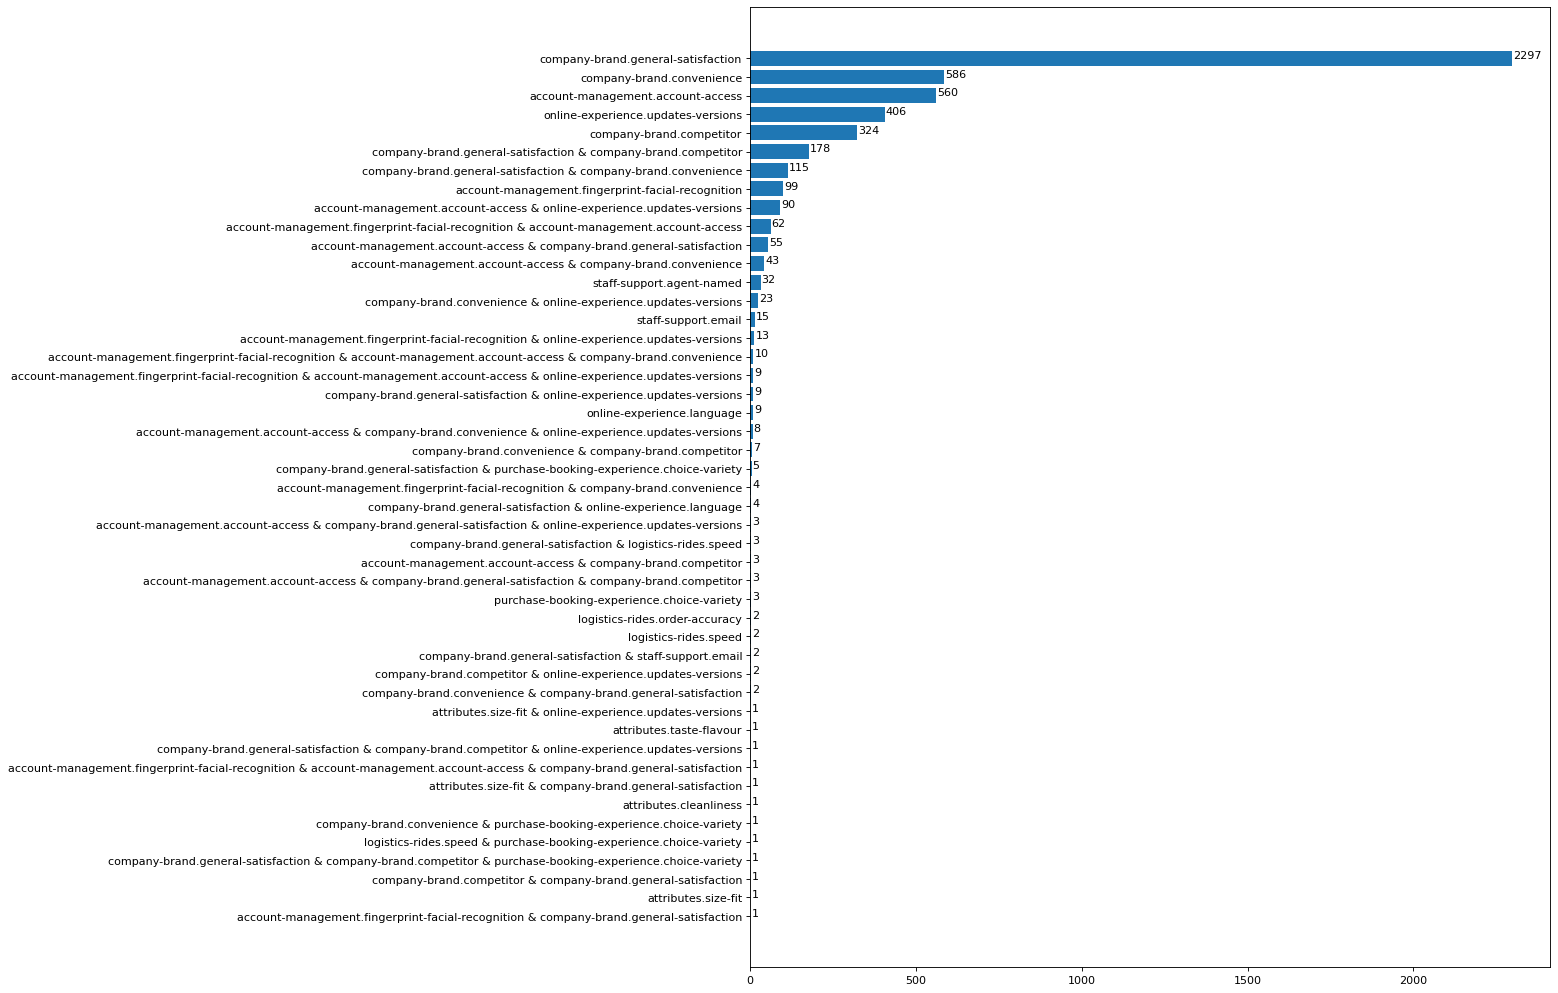

In [65]:
fig = plt.figure(figsize=(10, 12), dpi=80)
plt.xlabel('feature')
plt.ylabel('frequency')
plt.title('frequency of different features in applied dataset')

ax = fig.add_axes([0, 0, 1, 1])
ax.barh(feature_freqs_combinations.keys(), feature_freqs_combinations.values)

xlocs, xlabs = plt.xticks()
for i, v in enumerate(feature_freqs_combinations.values):
    ax.text(v + 3, i, str(v))

plt.show()

## Save result of Exploratory data analysis

### Lemmatization

In [66]:
import re
from nltk.stem.wordnet import WordNetLemmatizer

def make_lemmas(tokens):
    return ' '.join(list(map(lambda t: lemmatizer.lemmatize(t), tokens)))


def preprocess(text):
    return re.findall(re.compile(r'[A-ZА-Яa-zа-яёË]+'), text.lower())

def process_comment(comment):
    return make_lemmas(preprocess(comment))

lemmatizer = WordNetLemmatizer()

In [67]:
df['comment'] = df['comment'].map(process_comment)

In [68]:
df.to_csv("./dataset/post_processed.csv")